# Lectures 5-6: Statistics

## Example: mean, standard deviation of a sample

[ 204.47614076  200.08017895  162.10899937  183.69258116  182.28959971
  185.36492253  189.27264374  218.29880385  175.00103417  199.8385188 ]
Mean =   200
Median =   200
Mode =   200
Standard deviation =  25.0


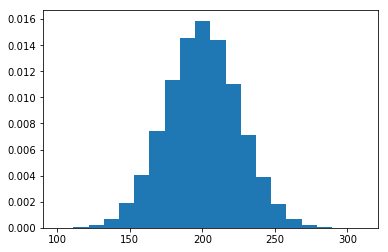

In [2]:
# standard preamble
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# create a set of data and compute mean and variance
# This creates an array of 100 elements, 
# gaussian-distributed with mean of 200 and RMS of 25
mu = 200
sigma = 25
x = mu + sigma*np.random.randn(100000)
print (x[0:10])
n, bins, patches = plt.hist(x, 20, normed=True)

# various measures of "average value":
print ('Mean = {0:5.0f}'.format(sp.mean(x)))
print ('Median = {0:5.0f}'.format(sp.median(x)))
print ('Mode = {0:5.0f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])))

# measure of the spreadx
print ('Standard deviation = {0:5.1f}'.format(np.std(x)))


## Fitting

The simplest technique to describe is least-squares fitting (see lecture notes). Usually you use the least-squares fit if you have a graph (i.e. a set of data points $y_i(x_i)$), you want to describe it in terms of a model $y(x;\theta)$, where parameters $\theta$ are unknown. You fit to determine the values of $\theta$ and (hopefully) their uncertainties.  

There are two standard cases where least-squares method is applicable:
1. You know errors for each data point $\sigma_i$ and you know that those errors are Gaussian. In this case, you minimize $\chi^2=\sum \left(\frac{y_i - y(x_i;\theta)}{\sigma_i}\right)^2$. The value of the $\chi^2_{\min}$ can be interpreted as a goodness-of-fit, and the errors on parameters $\theta$ have probabilistic interpretation
1. You know that the errors are Gaussian and are the same for each data point, but you do not know their magnitude. In this case, you would minimize the sum of squares: $\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. In this case the value of $\mathcal{S}$ can be used to compute the errors $\sigma_i$ for each data point, and the errors on $\theta$ have probabilistic definition, but you lose information about the goodness of fit
1. If the errors are not known to be Gaussian, then the least square method is not useful to estimate uncertainties or the goodness of fit. It is also not guaranteed to be unbiased or most efficient. 

### Examples

#### Polynomial fit

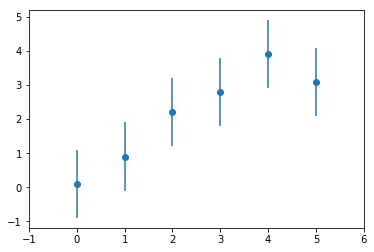

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter


# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
a0 = 0
b0 = 1
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,3.1])
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])

# plot it
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
plt.show()

Now define a the model:

In [4]:
# linear function
def model(x, a, b):
    return a + b*x

The fitter needs a good initial guess of parameters (more on that later):

[ 0.40952381  0.70285714]
[[ 0.19750113 -0.05386395]
 [-0.05386395  0.02154558]]
a= 0.410+/-0.444
b= 0.703+/-0.147
[[ 1.         -0.82572283]
 [-0.82572283  1.        ]]
chi^2 =  1.51
chi^2/d.f.= 0.38


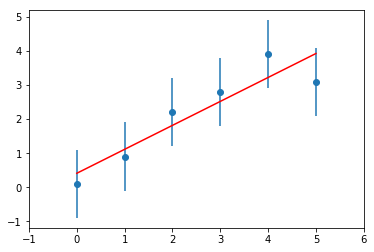

In [5]:
# Initial guess.
par0    = np.array([0.0, 1.0])
par, cov = fitter.curve_fit(model, xdata, ydata, p0=par0, sigma=sigma)
print (par)
print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}'.format(par[1],np.sqrt(cov[1,1])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((model(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')
plt.show()

[-0.11428571  1.48857143 -0.15714286]
[[ 0.16053059 -0.11516325  0.01744898]
 [-0.11516325  0.14203469 -0.02617347]
 [ 0.01744898 -0.02617347  0.00523469]]
a=-0.114+/-0.401
b= 1.489+/-0.377
c=-0.157+/-0.072
[[ 1.         -0.76267202  0.60192927]
 [-0.76267202  1.         -0.95988329]
 [ 0.60192927 -0.95988329  1.        ]]
chi^2 =  0.59
chi^2/d.f.= 0.20


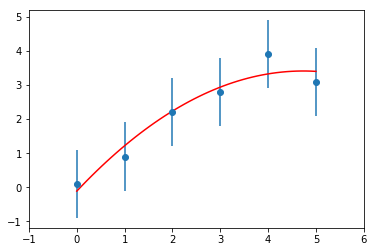

In [13]:
from numpy import sqrt

# quadratic function
def model2(x, a, b, c):
    return a + b*x + c*x*x

par0    = np.array([0.0, 1.0, 0.0])
par, cov = fitter.curve_fit(model2, xdata, ydata, par0, sigma)
print (par)
print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}'.format(par[1],sqrt(cov[1,1])))
print ('c={0:6.3f}+/-{1:5.3f}'.format(par[2],sqrt(cov[2,2])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((model2(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,model2(xfit,par[0],par[1], par[2]),'r-')
plt.show()

[ 0.1  -1.65  4.45 -2.55  0.6  -0.05]
[[ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]]
[[ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]]
chi^2 =  0.00
chi^2/d.f.=  inf


/Users/yury/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/yury/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars
/Users/yury/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in double_scalars


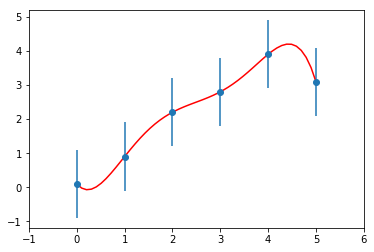

In [12]:
# Nth-order poly function
def modelN(*arg):
    x = arg[0]
    N = len(arg)-1
    sum = arg[1]
    for i in range(1,N):
        sum += arg[i+1]*x**i
    return sum

N=5   # poly degree
par0    = np.zeros(N+1)
par[1]=1
par, cov = fitter.curve_fit(modelN, xdata, ydata, par0, sigma)
print (par)
print (cov)

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((modelN(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,modelN(xfit,*par),'r-')
plt.show()

### Caveat: correlations

You may notice that poly parameters are highly correlated. You can reduce them by using *Chebychev polynomials*. Here is an example:

[ 2.16666667  0.70285714]
[[  6.28412704e-02   1.52261452e-10]
 [  1.52261452e-10   2.15455784e-02]]
a= 2.167+/-0.251
b= 0.703+/-0.147
[[  1.00000000e+00   4.13798023e-09]
 [  4.13798023e-09   1.00000000e+00]]
chi^2 =  1.51
chi^2/d.f.= 0.38


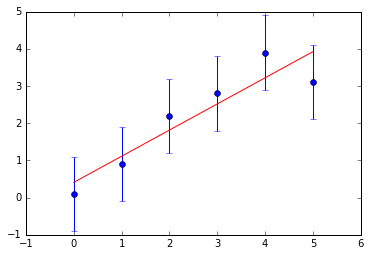

In [40]:
# linear function
def modelC(x, a, b):
    return a + b*(x-2.5)

# Initial guess.
par0    = np.array([0.0, 1.0])
par, cov = fitter.curve_fit(modelC, xdata, ydata, par0, sigma)
print (par)
print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}'.format(par[1],sqrt(cov[1,1])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((modelC(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print 'chi^2 = {0:5.2f}'.format(chi_squared)
print 'chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared)

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,modelC(xfit,par[0],par[1]),'r-')
plt.show()

### Warning: Lack of robustness
Gradient methods such as *Levenburg-Marquardt* used by *leastsq/curve_fit* are not robust and simply run into the nearest local minimum. Therefore, it is important to provide the initial set of values that are "close enough". Here is the demonstration below (courtesy https://python4mpia.github.io/fitting_data/least-squares-fitting.html)


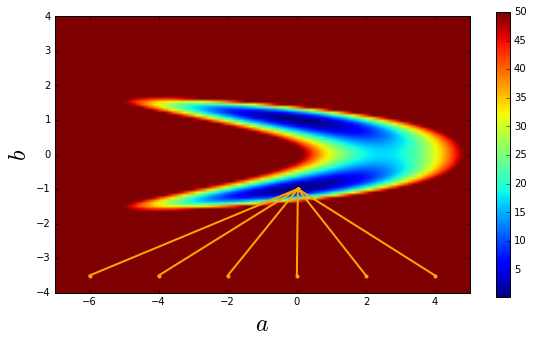

In [130]:
import numpy,math
import scipy.optimize as optimization
import matplotlib.pyplot as plt

# Chose a model that will create bimodality.
def func(x, a, b):
    return a + b*b*x  # Term b*b will create bimodality.

# Create toy data for curve_fit.
xdata = numpy.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = numpy.array([0.1,0.9,2.2,2.8,3.9,5.1])
sigma = numpy.array([1.0,1.0,1.0,1.0,1.0,1.0])

# Compute chi-square manifold.
Steps = 101  # grid size
Chi2Manifold = numpy.zeros([Steps,Steps])  # allocate grid
amin = -7.0  # minimal value of a covered by grid
amax = +5.0  # maximal value of a covered by grid
bmin = -4.0  # minimal value of b covered by grid
bmax = +4.0  # maximal value of b covered by grid
for s1 in range(Steps):
    for s2 in range(Steps):
        # Current values of (a,b) at grid position (s1,s2).
        a = amin + (amax - amin)*float(s1)/(Steps-1)
        b = bmin + (bmax - bmin)*float(s2)/(Steps-1)
        # Evaluate chi-squared.
        chi2 = 0.0
        for n in range(len(xdata)):
            residual = (ydata[n] - func(xdata[n], a, b))/sigma[n]
            chi2 = chi2 + residual*residual
        Chi2Manifold[Steps-1-s2,s1] = chi2  # write result to grid.

# Plot grid.
plt.figure(1, figsize=(8,4.5))
plt.subplots_adjust(left=0.09, bottom=0.09, top=0.97, right=0.99)
# Plot chi-square manifold.
image = plt.imshow(Chi2Manifold, vmax=50.0,
              extent=[amin, amax, bmin, bmax])
# Plot where curve-fit is going to for a couple of initial guesses.
for a_initial in -6.0, -4.0, -2.0, 0.0, 2.0, 4.0:
    # Initial guess.
    x0   = numpy.array([a_initial, -3.5])
    xFit = optimization.curve_fit(func, xdata, ydata, x0, sigma)[0]
    plt.plot([x0[0], xFit[0]], [x0[1], xFit[1]], 'o-', ms=4,
                 markeredgewidth=0, lw=2, color='orange')
plt.colorbar(image)  # make colorbar
plt.xlim(amin, amax)
plt.ylim(bmin, bmax)
plt.xlabel(r'$a$', fontsize=24)
plt.ylabel(r'$b$', fontsize=24)
plt.show()

### Example: histogram fitting 

Here is an example of an unbinned *max-likelihood* fit of a set of events to a Gaussian PDF
Courtesy http://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html

(-0.092454383339125049, 1.175050626780086)


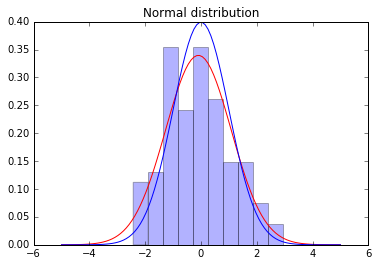

In [10]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title

# generate 100 events from a normal distrubution
# with mean 0 and standard deviation 1
sample = norm.rvs(loc=0,scale=1,size=100) 

par = norm.fit(sample) # distribution fitting

#hist(sample,20)

print par

# now, par[0] and par[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(-5,5,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=par[0],scale=par[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution')
hist(sample,normed=1,alpha=.3)
plot(x,pdf_fitted,'r-',x,pdf,'b-')
show()